In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import*
%matplotlib inline 

import seaborn as sns

In [10]:
sleep = pd.read_csv('sleep.csv').set_index('Unnamed: 0')

### 查看缺失值情况

In [11]:
sleep.head()

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
Unnamed: 0,,,,,,,,,,
1,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
3,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
4,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
5,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [385]:
sleep.isnull().sum()

BodyWgt      0
BrainWgt     0
NonD        14
Dream       12
Sleep        4
Span         4
Gest         4
Pred         0
Exp          0
Danger       0
dtype: int64

### 仅利用pandas style 表示缺失值

### 利数字标注缺失值，并绘图

In [435]:
# 给特定值上色
def showHight(col):
    c = col ==-1
    #c = col ==col.max()
    return ['background-color:red' if v else ' ' for v in c]


def count_miss(data,plot =True,figsize = (9,8)):
    df = data.isnull().replace({True:-1,False:0})
    df['.Row_Nums'] = 1

    df1 = df.groupby(by=list(data.columns)).agg(sum).sort_values('.Row_Nums',ascending =False).reset_index()
    df2 = data.isnull().sum().to_frame().T.rename(index = {0:' '})
    tem = pd.concat([df1,df2])
    if plot:
        data.isnull().sum().to_frame().plot(kind ='bar',figsize = (10,9),legend = False)
        
        plt.figure(figsize=(10,9))
        sns.heatmap(tem,vmax =0.0,cmap = 'OrRd_r',linecolor='white',linewidths=0.1, annot=True,cbar =False) 
        
    return tem.fillna('Missing_Nums').style.apply(showHight)

,.Row_Nums,BodyWgt,BrainWgt,Danger,Dream,Exp,Gest,NonD,Pred,Sleep,Span
0,42,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,-1,0,0,-1,0,0,0
2,3,0,0,0,0,0,-1,0,0,0,0
3,2,0,0,0,-1,0,0,-1,0,-1,0
4,2,0,0,0,0,0,0,-1,0,-1,0
5,2,0,0,0,0,0,0,0,0,0,-1
6,1,0,0,0,-1,0,0,-1,0,0,-1
7,1,0,0,0,0,0,-1,0,0,0,-1
,Missing_Nums,0,0,0,12,0,4,14,0,4,4


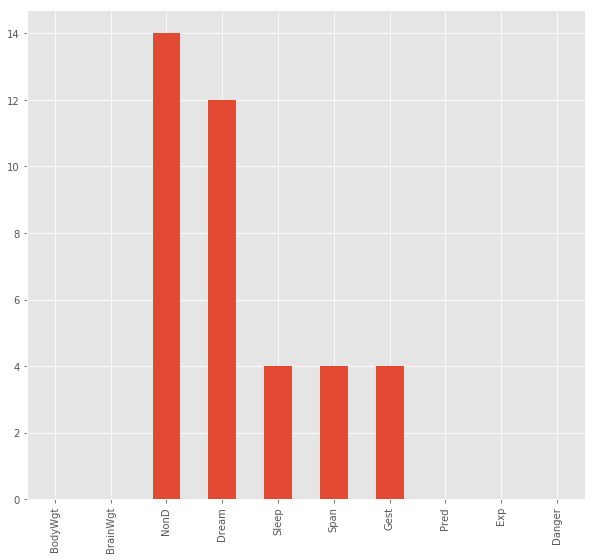

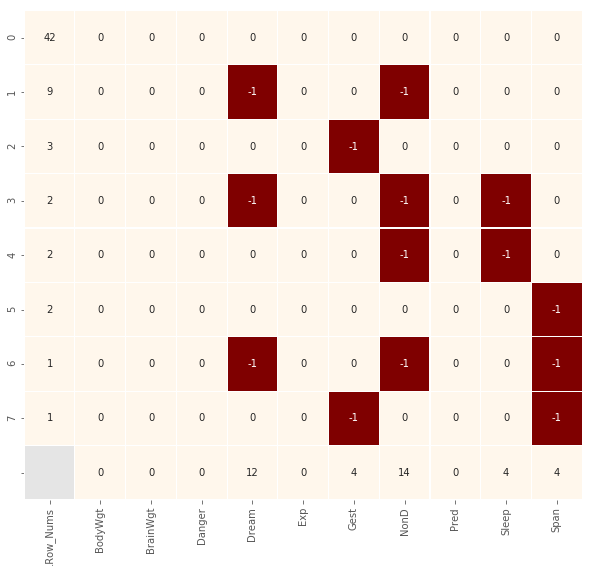

In [437]:
count_miss(sleep)

In [427]:
# 给特定值上色
def showHight(col):
    c = col =='NaN'
    #c = col ==col.max()
    return ['background-color:red' if v else ' ' for v in c]


def count_miss(data):
    df = data.isnull().replace({True:'NaN',False:' '})
    df['.Row_Nums'] = 1

    df1 = df.groupby(by=list(data.columns)).agg(sum).sort_values('.Row_Nums',ascending =False).reset_index()
    df2 = data.isnull().sum().to_frame().T.rename(index = {0:' '})
    tem = pd.concat([df1,df2]).fillna('Missing_Nums')
    return tem.style.apply(showHight)

In [428]:
count_miss(sleep)

,.Row_Nums,BodyWgt,BrainWgt,Danger,Dream,Exp,Gest,NonD,Pred,Sleep,Span
0,42,,,,,,,,,,
1,9,,,,NaN,,,NaN,,,
2,3,,,,,,NaN,,,,
3,2,,,,,,,,,,NaN
4,2,,,,,,,NaN,,NaN,
5,2,,,,NaN,,,NaN,,NaN,
6,1,,,,,,NaN,,,,NaN
7,1,,,,NaN,,,NaN,,,NaN
,Missing_Nums,0,0,0,12,0,4,14,0,4,4
